In [1]:
import tensorflow as tf
import numpy as np
import os

In [2]:
base_dir = 'C:\\Users\\jdrdz\\Desktop\\tomato_dataset_with_augmentation'
validation_dir = os.path.join(base_dir, 'validation')
train_dir = os.path.join(base_dir, 'train')

In [3]:
ImageDataGenerator =  tf.keras.preprocessing.image.ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=25,)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=25)

Found 6981 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (25, 256, 256, 3)
labels batch shape: (25, 10)


In [9]:
history = model.fit(
        train_generator,
        steps_per_epoch=28,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=6)

Epoch 1/10
28/28 [==============================] - 34s 1s/step - loss: 390.4766 - accuracy: 0.1000 - val_loss: 150.6088 - val_accuracy: 0.0933
Epoch 2/10
28/28 [==============================] - 34s 1s/step - loss: 109.1829 - accuracy: 0.1186 - val_loss: 93.8080 - val_accuracy: 0.1267
Epoch 3/10
28/28 [==============================] - 33s 1s/step - loss: 79.1028 - accuracy: 0.1357 - val_loss: 48.3844 - val_accuracy: 0.1933
Epoch 4/10
28/28 [==============================] - 33s 1s/step - loss: 69.4942 - accuracy: 0.1271 - val_loss: 78.7543 - val_accuracy: 0.1133
Epoch 5/10
28/28 [==============================] - 34s 1s/step - loss: 59.8626 - accuracy: 0.1486 - val_loss: 45.2264 - val_accuracy: 0.1667
Epoch 6/10
28/28 [==============================] - 33s 1s/step - loss: 51.1312 - accuracy: 0.1586 - val_loss: 45.3430 - val_accuracy: 0.1467
Epoch 7/10
28/28 [==============================] - 32s 1s/step - loss: 42.5319 - accuracy: 0.1514 - val_loss: 37.5950 - val_accuracy: 0.2667
Epo

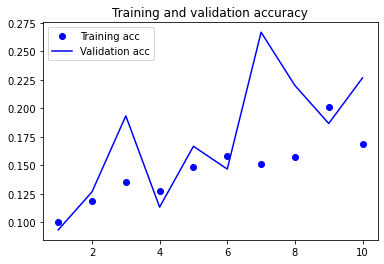

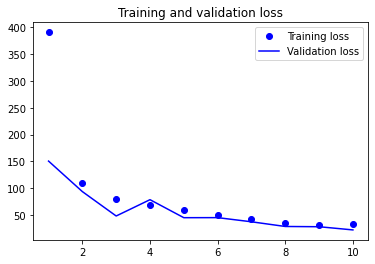

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()